# **Telecom Churn Case Study**

###**Problem Statement**


---




In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Steps:-


---

1.   Reading, understanding and visualising the data
2.   Preparing the data for modelling
3.   Building the model
4.   Evaluate the model


The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:


---




1.  It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2.  It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3.  Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4.  Recommend strategies to manage customer churn based on your observations.


---



## Step 1 : Data Understanding And Importing importnt libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('train.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
df.shape

(69999, 172)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
df.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [8]:
def table_info(table):
  t_info = pd.DataFrame({
      'Datatype' : table.dtypes.astype(str),
     'Non_Null_Count': table.count(axis = 0).astype(int), 
      'Null_Count': table.isnull().sum().astype(int), 
      'Null_Percentage': round(table.isnull().sum()/len(table) * 100 , 2), 
      'Unique_Values_Count': table.nunique().astype(int)       
  }).sort_values(by='Null_Percentage', ascending=False)
  t_info.to_csv("table_info.csv")
  return t_info

table_info(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
count_rech_2g_6,float64,17568,52431,74.9,30
night_pck_user_6,float64,17568,52431,74.9,2
arpu_2g_6,float64,17568,52431,74.9,5389
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
last_day_rch_amt_8,int64,69999,0,0.0,191
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359


## Step 2 : Data Cleaning And missing Values

In [9]:
# Renaming columns 
df = df.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [10]:
# Dropping columns with 1 unique value

columns=df.columns
single_value_col=[]

for column in columns:
    unique_value_count=df[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
print(single_value_col)

df.drop(columns=single_value_col, inplace=True)
table_info(df)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
night_pck_user_6,float64,17568,52431,74.9,2
total_rech_data_6,float64,17568,52431,74.9,36
max_rech_data_6,float64,17568,52431,74.9,47
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359
vol_3g_mb_6,float64,69999,0,0.0,9768


In [11]:
df.shape

(69999, 159)

In [12]:
#Checking for missing values.
t_info = table_info(df)
Missing_Values = t_info[t_info['Null_Percentage'] > 50]
Missing_Values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
night_pck_user_6,float64,17568,52431,74.90,2
total_rech_data_6,float64,17568,52431,74.90,36
max_rech_data_6,float64,17568,52431,74.90,47
date_of_last_rech_data_6,object,17568,52431,74.90,30
count_rech_2g_6,float64,17568,52431,74.90,30
av_rech_amt_data_6,float64,17568,52431,74.90,792
fb_user_6,float64,17568,52431,74.90,2
count_rech_3g_6,float64,17568,52431,74.90,23
arpu_2g_6,float64,17568,52431,74.90,5389


In [13]:
Missing_Values_columns = Missing_Values.index
df.drop(columns=Missing_Values_columns, inplace=True)

In [14]:
df.shape

(69999, 129)

In [15]:
table_info(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2f_mou_8,float64,66296,3703,5.29,1945
loc_og_mou_8,float64,66296,3703,5.29,21950
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
og_others_8,float64,66296,3703,5.29,179
...,...,...,...,...,...
max_rech_amt_6,int64,69999,0,0.00,190
max_rech_amt_7,int64,69999,0,0.00,178
max_rech_amt_8,int64,69999,0,0.00,202
last_day_rch_amt_6,int64,69999,0,0.00,179


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 129 entries, id to churn_probability
dtypes: float64(99), int64(27), object(3)
memory usage: 68.9+ MB


In [17]:
import re
def Data_in_columns(dataset,col):
  col_month_columns = []
  for column in dataset.columns:
    if col==6:
      x = re.search("6$", column)
    elif col==7:
      x = re.search("7$", column)
    elif col==8:
      x = re.search("8$", column)

    if x:
        col_month_columns.append(column)
  return col_month_columns

Data_in_columns(df,8)

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'vbc_3g_8']

In [18]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


,null
std_og_t2f_mou_8,5.29
loc_og_mou_8,5.29
loc_og_t2c_mou_8,5.29
loc_ic_t2m_mou_8,5.29
og_others_8,5.29
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00


In [19]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [20]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [21]:
df.shape

(69999, 129)

Filter high-value customers

Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [22]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [23]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

Filter the customers, who have recharged more than or equal to X.

In [24]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


In [25]:
df.shape

(21018, 130)

We can see that we have around *~21k* rows after filtering

#Handling missing values in rows

---



In [26]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(80, 130)

In [27]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(20938, 130)

In [28]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_t2t_mou_8,2.75
roam_og_mou_8,2.75
loc_og_t2c_mou_8,2.75
std_ic_mou_8,2.75
isd_og_mou_8,2.75
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


Looks like MOU for all the types of calls for the month of August (8) have missing values together for any particular record.

Lets check the records for the MOU for August(8), in which these coulmns have missing values together.

In [29]:
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['std_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_ic_mou_8', 'isd_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'spl_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8', 'std_og_t2f_mou_8', 'loc_og_t2t_mou_8', 'spl_ic_mou_8', 'og_others_8', 'std_ic_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'roam_ic_mou_8', 'loc_ic_mou_8', 'offnet_mou_8', 'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'ic_others_8']


In [30]:
# Creating a dataframe with the condition, in which MOU for AUG(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2f_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2f_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7
177,177,596.301,146.073,0.0,55.19,3.26,NaN,45.51,12.34,NaN,...,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,183,263.340,806.465,0.0,211.89,119.89,NaN,94.69,106.08,NaN,...,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,491,1748.607,1172.416,0.0,3709.38,2343.29,NaN,835.58,698.74,NaN,...,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,597,578.568,141.341,0.0,236.08,103.83,NaN,545.13,106.46,NaN,...,0,0,0,0,227,0.0,0.0,0.00,1,375.0
664,664,475.536,137.251,0.0,25.26,11.58,NaN,574.48,148.59,NaN,...,0,0,0,0,499,0.0,0.0,0.00,1,385.0


In [31]:
df_null_mou_8.shape

(575, 130)

In [32]:
# Deleting the records for which MOU for october 8 are null
df = df.drop(df_null_mou_8.index)

In [33]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
date_of_last_rech_8,1.05
loc_ic_mou_6,0.62
loc_og_t2t_mou_6,0.62
std_og_t2f_mou_6,0.62
isd_og_mou_6,0.62
...,...
loc_ic_t2f_mou_8,0.00
loc_ic_t2m_mou_8,0.00
loc_ic_t2t_mou_8,0.00
total_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of june(6) have missing values together for any particular record.

Lets check the records for the MOU for june(6), in which these coulmns have missing values together.

In [34]:
# Listing the columns of MOU june (6)
print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['loc_ic_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2f_mou_6', 'isd_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'loc_og_mou_6', 'std_ic_t2f_mou_6', 'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_t2f_mou_6', 'spl_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'roam_ic_mou_6', 'ic_others_6', 'onnet_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'offnet_mou_6', 'isd_ic_mou_6', 'roam_og_mou_6', 'std_og_mou_6']


In [35]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2f_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2f_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7
599,599,726.813,726.788,438.050,NaN,NaN,0.00,NaN,NaN,3.30,...,1,0,0,0,451,0.0,0.00,0.00,0,855.0
2248,2248,387.414,386.494,774.756,NaN,NaN,0.00,NaN,NaN,0.00,...,2,0,0,0,445,0.0,0.00,0.00,0,455.0
2393,2393,0.040,673.807,796.780,NaN,65.29,56.19,NaN,381.54,539.66,...,0,0,0,0,479,0.0,0.00,0.00,0,402.5
2754,2754,0.000,492.442,575.801,NaN,396.01,449.61,NaN,391.98,375.64,...,0,0,0,0,2719,0.0,0.00,0.00,0,408.5
3487,3487,266.914,722.042,1078.905,NaN,NaN,0.00,NaN,NaN,0.00,...,4,0,0,0,517,3011.4,458.66,729.82,0,503.0


In [36]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_6.index)

In [37]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
date_of_last_rech_8,1.05
date_of_last_rech_7,0.24
loc_ic_mou_7,0.15
og_others_7,0.15
loc_og_mou_7,0.15
...,...
spl_og_mou_6,0.00
isd_og_mou_8,0.00
isd_og_mou_6,0.00
std_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of july (7) have missing values together for any particular record.

Lets check the records for the MOU for july(7), in which these coulmns have missing values together.

In [38]:
# Listing the columns of MOU July (7)
print(((df_missing_columns[df_missing_columns['null'] == 0.15]).index).to_list())


['loc_ic_mou_7', 'og_others_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2f_mou_7', 'ic_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2f_mou_7', 'std_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_7', 'roam_ic_mou_7', 'loc_og_t2m_mou_7']


In [39]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2f_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2f_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7
1054,1054,903.979,0.000,317.133,181.98,NaN,90.56,2062.21,NaN,688.96,...,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,1404,254.142,426.744,305.578,1.40,NaN,39.13,1.91,NaN,118.33,...,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,1641,973.728,0.000,244.360,178.84,NaN,80.71,392.38,NaN,118.23,...,0,0,0,0,3370,0.00,0.00,0.00,0,375.0
10706,10706,972.338,0.000,100.618,990.83,NaN,14.38,1049.53,NaN,25.81,...,0,0,0,0,181,0.00,0.00,0.00,1,543.0
12755,12755,747.552,0.210,611.178,1800.23,NaN,1167.46,11.31,NaN,48.04,...,0,0,0,0,327,0.00,0.00,0.00,0,420.0


In [40]:
# Deleting the records for which MOU for July(7) are null
df = df.drop(df_null_mou_7.index)

In [41]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
date_of_last_rech_8,1.05
date_of_last_rech_7,0.24
date_of_last_rech_6,0.10
id,0.00
ic_others_7,0.00
...,...
std_og_t2f_mou_7,0.00
std_og_t2f_mou_6,0.00
std_og_t2m_mou_8,0.00
std_og_t2m_mou_7,0.00


We can see there are no more missing values in any columns.

In [42]:
df.shape

(20206, 130)

In [43]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.33


We can see that we have lost almost 33% records. But we have enough number of records to do our analysis.

#Tag churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

---



In [44]:
df['churn'] = np.where((df['total_ic_mou_8']==0) & (df['total_og_mou_8']==0) & (df['vol_2g_mb_8']==0) & (df['vol_3g_mb_8']==0), 1, 0)

In [45]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7,churn
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,0,322,0.0,0.0,0.0,0,469.5,0
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,602,0.0,0.0,0.0,0,527.0,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,455,0.0,0.0,0.0,0,1205.0,0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,0,0,1219,0.0,0.0,0.0,0,433.5,0
25,25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,...,0,0,0,2831,0.0,0.0,0.0,0,405.0,0


In [46]:
# List the columns for churn month(9)
col_8 = [col for col in df.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8']


In [47]:
# Deleting the churn month columns
df = df.drop(col_8, axis=1)

In [48]:
#Checking churn percentage
round(100*(df['churn'].mean()),2)

3.07



---


##There is very little percentage of churn rate. We will take care of the class imbalance later.


---




#Outliers treatment
In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [49]:
df['id'] = df['id'].astype(object)
df['churn'] = df['churn'].astype(object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20206 entries, 12 to 69996
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20206 non-null  object 
 1   arpu_6               20206 non-null  float64
 2   arpu_7               20206 non-null  float64
 3   onnet_mou_6          20206 non-null  float64
 4   onnet_mou_7          20206 non-null  float64
 5   offnet_mou_6         20206 non-null  float64
 6   offnet_mou_7         20206 non-null  float64
 7   roam_ic_mou_6        20206 non-null  float64
 8   roam_ic_mou_7        20206 non-null  float64
 9   roam_og_mou_6        20206 non-null  float64
 10  roam_og_mou_7        20206 non-null  float64
 11  loc_og_t2t_mou_6     20206 non-null  float64
 12  loc_og_t2t_mou_7     20206 non-null  float64
 13  loc_og_t2m_mou_6     20206 non-null  float64
 14  loc_og_t2m_mou_7     20206 non-null  float64
 15  loc_og_t2f_mou_6     20206 non-null

In [51]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
      

In [52]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(20004, 89)

#Derive new features

In [53]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

#Deriving new column decrease_mou_action

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [54]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [55]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_6'] + data['total_ic_mou_7'])/2

In [56]:

# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [57]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [58]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,aon,vbc_3g_7,vbc_3g_6,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,...,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,...,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,...,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,...,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,...,2831,0.0,0.0,0,405.0,0,1018.32,823.405,-194.915,1


#Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase

In [59]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,...,0,469.5,0,850.93,861.250,10.320,0,12.5,-2.5,1
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,...,0,527.0,0,560.82,852.500,291.680,0,4.0,-1.0,1
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,...,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-3.5,1
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,...,0,433.5,0,854.46,778.080,-76.380,1,7.0,0.0,0
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,...,0,405.0,0,1018.32,823.405,-194.915,1,6.5,-1.5,1


#Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [60]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,...,850.93,861.250,10.320,0,12.5,-2.5,1,469.5,-51.5,1
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,...,560.82,852.500,291.680,0,4.0,-1.0,1,527.0,-127.0,1
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,...,1751.53,1511.360,-240.170,1,22.5,-3.5,1,1205.0,-215.0,1
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,...,854.46,778.080,-76.380,1,7.0,0.0,0,433.5,-6.5,1
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,...,1018.32,823.405,-194.915,1,6.5,-1.5,1,405.0,75.0,0


Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [61]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_6'] + data['arpu_7'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,...,0,12.5,-2.5,1,469.5,-51.5,1,418.9325,-20.9865,1
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,...,0,4.0,-1.0,1,527.0,-127.0,1,478.9215,-101.6275,1
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,...,1,22.5,-3.5,1,1205.0,-215.0,1,1018.2270,-112.7210,1
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,...,1,7.0,0.0,0,433.5,-6.5,1,362.0215,-9.9525,1
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,...,1,6.5,-1.5,1,405.0,75.0,0,342.3570,-20.5940,1


#**EDA**

#Univariate analysis
Churn rate on the basis whether the customer decreased her/his MOU in action month

In [62]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

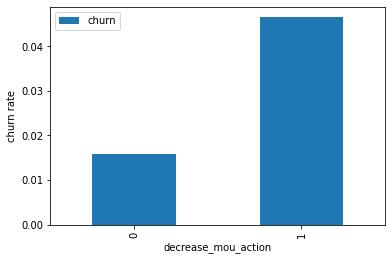

In [63]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

*Analysis*

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

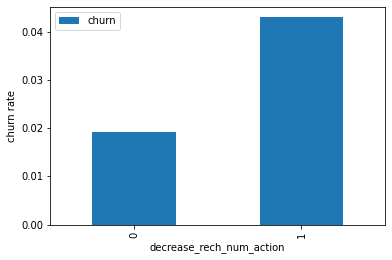

In [64]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

*Analysis*

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

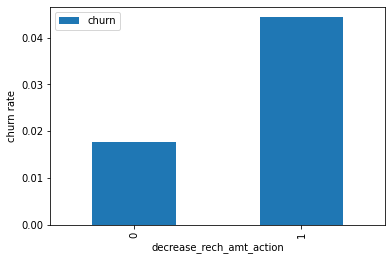

In [65]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


*Analysis*

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

Churn rate on the basis whether the customer decreased her/his volume based cost in action month

In [66]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

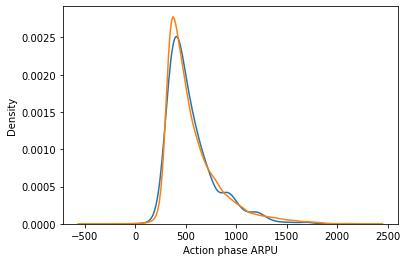

In [67]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 400. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

##Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

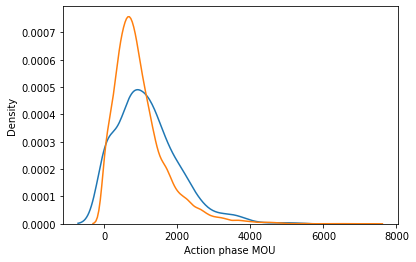

In [68]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2000 range. Higher the MOU, lesser the churn probability.

#Bivariate analysis


Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

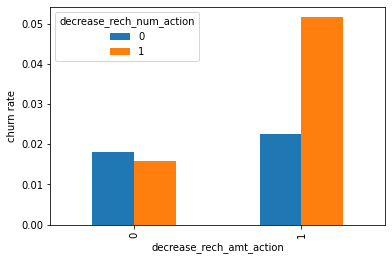

In [69]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

*Analysis*

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

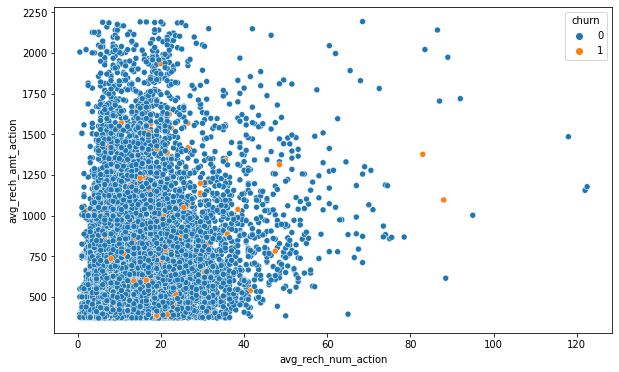

In [70]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

*Analysis*

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

##Dropping few derived columns, which are not required in further analysis


In [71]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_amt_6_7'], axis=1)

In [72]:
data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,...,sachet_3g_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,churn,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
12,12,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,...,0,322,0.0,0.0,0,0,0,1,1,1
15,15,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,...,0,602,0.0,0.0,0,0,0,1,1,1
23,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,...,0,455,0.0,0.0,0,0,1,1,1,1
24,24,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,...,0,1219,0.0,0.0,0,0,1,0,1,1
25,25,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,...,0,2831,0.0,0.0,0,0,1,1,0,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 12 to 69996
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20004 non-null  object 
 1   arpu_6                    20004 non-null  float64
 2   arpu_7                    20004 non-null  float64
 3   onnet_mou_6               20004 non-null  float64
 4   onnet_mou_7               20004 non-null  float64
 5   offnet_mou_6              20004 non-null  float64
 6   offnet_mou_7              20004 non-null  float64
 7   roam_ic_mou_6             20004 non-null  float64
 8   roam_ic_mou_7             20004 non-null  float64
 9   roam_og_mou_6             20004 non-null  float64
 10  roam_og_mou_7             20004 non-null  float64
 11  loc_og_t2t_mou_6          20004 non-null  float64
 12  loc_og_t2t_mou_7          20004 non-null  float64
 13  loc_og_t2m_mou_6          20004 non-null  float64
 14  loc_o

In [74]:
data.shape

(20004, 92)

In [75]:
data = data.drop(['date_of_last_rech_6','date_of_last_rech_7'], axis=1)

In [76]:
data.shape

(20004, 90)

#**Train-Test Split**

In [77]:
# Import library
from sklearn.model_selection import train_test_split

In [78]:
# Putting feature variables into X
X = data.drop(['id','churn'], axis=1)

In [79]:
# Putting target variable to y
y = data['churn']

In [80]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).



In [81]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [82]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)


In [83]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)



---



In [84]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()

In [85]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')

In [86]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_6,sachet_3g_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
0,-1.912767,1.642312,-0.767244,0.610850,-0.940302,2.251422,-0.079919,-0.282853,-0.242098,-0.449995,...,-0.123384,-0.111907,-0.833902,-0.244521,-0.242420,-0.522105,0,0,0,0
1,0.173913,0.826880,0.003209,-0.291031,-0.082746,1.224479,-0.281074,-0.343294,-0.318125,-0.488182,...,2.655785,2.747932,1.190386,-0.244521,0.282586,-0.522105,0,1,0,0
2,-0.463272,0.421581,-0.590338,-0.519862,0.177392,0.727346,-0.281074,-0.343294,-0.318125,-0.488182,...,-0.123384,-0.111907,1.441821,-0.244521,-0.242420,-0.522105,0,1,0,0
3,0.727081,0.463027,-0.651140,-0.434661,-0.082989,0.139159,-0.281074,-0.343294,-0.318125,-0.488182,...,-0.123384,-0.111907,0.480313,1.048633,-0.093948,-0.522105,0,1,0,1
4,-0.428597,-0.383500,-0.128642,-0.078656,0.075574,0.026127,0.212780,0.173332,0.004122,-0.176665,...,-0.123384,-0.111907,-0.178541,-0.244521,-0.242420,-0.522105,1,1,1,1


In [87]:
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_6,sachet_3g_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
0,-1.912767,1.642312,-0.767244,0.610850,-0.940302,2.251422,-0.079919,-0.282853,-0.242098,-0.449995,...,-0.123384,-0.111907,-0.833902,-0.244521,-0.242420,-0.522105,0,0,0,0
1,0.173913,0.826880,0.003209,-0.291031,-0.082746,1.224479,-0.281074,-0.343294,-0.318125,-0.488182,...,2.655785,2.747932,1.190386,-0.244521,0.282586,-0.522105,0,1,0,0
2,-0.463272,0.421581,-0.590338,-0.519862,0.177392,0.727346,-0.281074,-0.343294,-0.318125,-0.488182,...,-0.123384,-0.111907,1.441821,-0.244521,-0.242420,-0.522105,0,1,0,0
3,0.727081,0.463027,-0.651140,-0.434661,-0.082989,0.139159,-0.281074,-0.343294,-0.318125,-0.488182,...,-0.123384,-0.111907,0.480313,1.048633,-0.093948,-0.522105,0,1,0,1
4,-0.428597,-0.383500,-0.128642,-0.078656,0.075574,0.026127,0.212780,0.173332,0.004122,-0.176665,...,-0.123384,-0.111907,-0.178541,-0.244521,-0.242420,-0.522105,1,1,1,1


##Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [88]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_6,sachet_3g_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action
58165,-1.829895,3.359759,-0.785334,5.638013,-0.903831,1.170777,-0.218502,-0.333482,-0.187619,-0.400522,...,-0.123384,-0.111907,-0.400875,-0.244521,-0.242420,-0.522105,0,0,0,0
603,-0.002146,-0.016705,-0.268793,0.775729,-0.292925,-0.736539,-0.267414,-0.332855,-0.121879,-0.226308,...,-0.123384,1.318013,-0.970097,-0.244521,2.078634,-0.522105,0,1,1,1
28696,-0.241687,0.107897,-0.664742,-0.370800,-0.034281,0.483164,-0.281074,0.848213,-0.318125,0.623383,...,1.266200,-0.111907,0.275440,1.351343,0.633673,-0.522105,0,0,1,0
34825,-0.131394,-0.160000,1.818581,0.666928,-0.624004,-0.649369,-0.281074,-0.343294,-0.318125,-0.488182,...,4.045370,2.747932,0.061254,-0.244521,0.717188,-0.522105,1,1,1,1
17757,0.462242,0.576622,-0.567800,-0.545197,-0.263886,0.053711,-0.281074,-0.343294,-0.318125,-0.488182,...,-0.123384,-0.111907,0.296393,-0.244521,-0.242420,-0.522105,0,1,1,1


#**Model with PCA**

---



In [89]:
#Import PCA
from sklearn.decomposition import PCA

In [90]:
# Instantiate PCA
pca = PCA(random_state=42)


In [91]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [92]:
# Principal components
pca.components_

array([[ 6.37369855e-02,  1.33466400e-01, -5.11447378e-02, ...,
        -2.41312031e-03, -2.01505247e-02, -1.72869697e-02],
       [ 2.10672752e-01,  1.85191002e-01,  1.96033087e-01, ...,
         9.44751104e-03,  7.20071734e-03,  8.76759812e-04],
       [ 5.45649454e-02,  2.34682576e-01, -8.36188905e-02, ...,
        -5.03831180e-02, -6.07916687e-02, -5.93173566e-02],
       ...,
       [ 9.45124193e-07, -9.31301103e-07, -3.33644174e-05, ...,
         2.42850224e-07, -4.72267000e-07, -4.81992721e-08],
       [-1.54525247e-07,  1.88171563e-07, -2.72867403e-05, ...,
         4.23672110e-07,  8.85118371e-08,  1.14285496e-07],
       [ 2.05316593e-07, -1.36059119e-07, -3.10169331e-05, ...,
         2.52093816e-07, -4.20100850e-07,  5.45303600e-08]])

In [93]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11105199 0.19556282 0.24904362 0.29791977 0.34247437 0.38546533
 0.42622718 0.45826713 0.48591333 0.51197127 0.5370245  0.56077795
 0.58402132 0.60528304 0.62475279 0.64394151 0.66199326 0.67957211
 0.6962332  0.71191286 0.72723374 0.74206625 0.75554276 0.76856885
 0.7804083  0.79199813 0.80313863 0.8138273  0.8242495  0.83404847
 0.84345585 0.85268286 0.86178049 0.87010066 0.87749114 0.88453105
 0.89138612 0.89767471 0.90378978 0.90965362 0.91542898 0.9210016
 0.92619735 0.93128235 0.93602495 0.9398667  0.94363975 0.94734665
 0.95090973 0.95436253 0.95771084 0.96104006 0.96418444 0.96718103
 0.97012193 0.97301405 0.97578935 0.97851999 0.98100077 0.98341932
 0.98577912 0.9880686  0.99010418 0.99205363 0.99371028 0.99495363
 0.99612781 0.99723366 0.99815288 0.99897519 0.99944671 0.9998557
 0.99996217 0.99999913 0.99999987 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


Text(0, 0.5, 'Cumulative Variance')

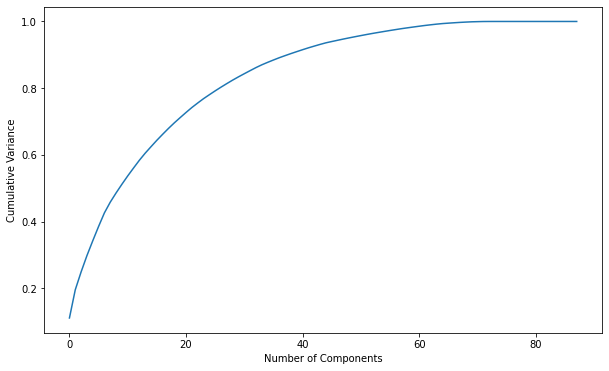

In [94]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 50 components explain amost more than 90% variance of the data. So, we will perform PCA with 50 components.



#Performing PCA with 50 components

In [95]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [96]:
# Instantiate PCA with 50 components
pca_final = IncrementalPCA(n_components=50)

In [97]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set

We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.



In [98]:
X_test_pca = pca_final.transform(X_test)

Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.


Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.




#Logistic regression with PCA

---



In [99]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [100]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [101]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [102]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [103]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178066,0.016486,0.004532,0.000108,0.01,{'C': 0.01},0.899745,0.896335,0.909120,0.893780,...,0.898884,0.005476,6,0.899298,0.899488,0.898094,0.899274,0.901598,0.899550,0.001137
1,0.260125,0.010202,0.004571,0.000089,0.1,{'C': 0.1},0.903895,0.899307,0.910737,0.896970,...,0.900951,0.005890,1,0.901073,0.901889,0.899381,0.901130,0.903697,0.901434,0.001398
2,0.313996,0.012210,0.004484,0.000067,1,{'C': 1},0.903257,0.898646,0.910737,0.895694,...,0.899926,0.006663,2,0.900347,0.901248,0.899300,0.899758,0.903536,0.900838,0.001498
3,0.399870,0.089025,0.005661,0.001439,10,{'C': 10},0.902937,0.898316,0.910414,0.895694,...,0.899796,0.006458,3,0.900024,0.901088,0.899139,0.899677,0.902971,0.900580,0.001354
4,0.538672,0.143663,0.005179,0.000784,100,{'C': 100},0.902618,0.897986,0.910414,0.895694,...,0.899666,0.006444,5,0.900024,0.900928,0.899220,0.899677,0.902971,0.900564,0.001327
5,0.359065,0.031005,0.004575,0.000087,1000,{'C': 1000},0.902937,0.897986,0.910414,0.895694,...,0.899729,0.006475,4,0.899863,0.901008,0.899220,0.899677,0.902971,0.900548,0.001347


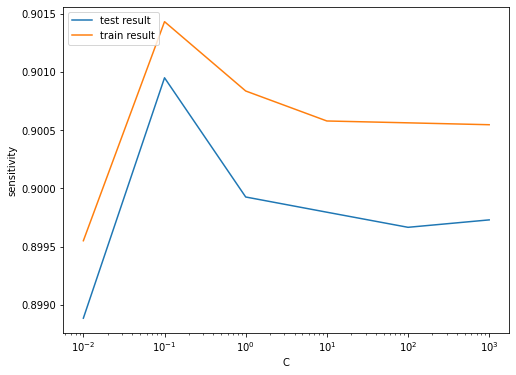

In [104]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

*Analysis*

sensitivity is 0.90

In [105]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9009513370721269 at C = 0.1


#Logistic regression with optimal C

---



In [106]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [107]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [108]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13251  2274]
 [ 1535 13990]]


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8773268921095008
Sensitivity:- 0.9011272141706924
Specificity:- 0.8535265700483092


#Prediction on the test set

In [111]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [112]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[3293  574]
 [  22  112]]


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8510372406898276
Sensitivity:- 0.835820895522388
Specificity:- 0.8515645202999741


#*Model summary*


---



##Train set

Accuracy = 0.87

Sensitivity = 0.90

Specificity = 0.85



---


##Test set

Accuracy = 0.85

Sensitivity = 0.83

Specificity = 0.85


---



Overall, the model is performing well in the test set, what it had learnt from the train set

##Support Vector Machine(SVM) with PCA

In [115]:
# Importing SVC
from sklearn.svm import SVC

#Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications

In [116]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [117]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.648994,0.287225,5.008818,0.372535,1,0.01,"{'C': 1, 'gamma': 0.01}",0.936135,0.937005,0.935169,0.936103,0.000750,5,0.940145,0.940048,0.939324,0.939839,0.000366
1,12.487345,0.345609,6.813745,0.791470,1,0.001,"{'C': 1, 'gamma': 0.001}",0.879710,0.882222,0.884734,0.882222,0.002051,10,0.884589,0.882560,0.884010,0.883720,0.000853
2,17.019827,0.739437,9.136713,0.334543,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.852754,0.855169,0.858454,0.855459,0.002336,12,0.855652,0.856908,0.854058,0.855539,0.001166
3,9.648770,0.094624,3.057973,0.063335,10,0.01,"{'C': 10, 'gamma': 0.01}",0.959034,0.956618,0.960966,0.958873,0.001779,3,0.967633,0.966957,0.965652,0.966747,0.000822
4,11.098014,0.289100,5.480404,0.537851,10,0.001,"{'C': 10, 'gamma': 0.001}",0.902705,0.902899,0.906087,0.903897,0.001551,8,0.907633,0.905797,0.907681,0.907037,0.000877
5,13.130802,0.315782,8.068389,0.782014,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.871787,0.874976,0.877488,0.874750,0.002333,11,0.877295,0.875121,0.875749,0.876055,0.000913
6,13.063621,0.405498,2.455353,0.546612,100,0.01,"{'C': 100, 'gamma': 0.01}",0.970531,0.970435,0.973720,0.971562,0.001526,2,0.985604,0.985024,0.984589,0.985072,0.000416
7,14.112632,0.619898,4.940011,0.314389,100,0.001,"{'C': 100, 'gamma': 0.001}",0.931691,0.931981,0.929275,0.930982,0.001213,6,0.936522,0.935314,0.935362,0.935733,0.000558
8,13.198105,0.362909,5.893792,0.579189,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.883575,0.886570,0.887923,0.886023,0.001817,9,0.889420,0.886618,0.886957,0.887665,0.001249
9,24.361990,1.384703,1.434564,0.065587,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.975942,0.975072,0.980290,0.977101,0.002282,1,0.996425,0.995652,0.995894,0.995990,0.000323


##Plotting the accuracy with various C and gamma values

In [118]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')


In [119]:
# # plotting
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

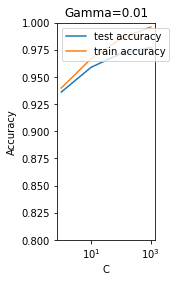

In [120]:
# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

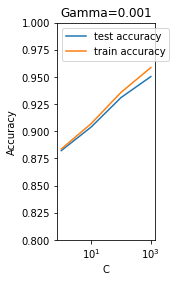

In [121]:
# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


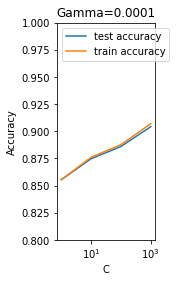

In [122]:
# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [123]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9771014492753624 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.01) we have train and test accuracy almost same.

Also, at C=1000 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~97%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:





---
Build the model with optimal hyperparameters

---




In [124]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

Prediction on the train set

In [125]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13269  2256]
 [ 1174 14351]]


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8895330112721417
Sensitivity:- 0.9243800322061192
Specificity:- 0.8546859903381643


Prediction on the test set

In [129]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3321  546]
 [  25  109]]


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8572856785803549
Sensitivity:- 0.8134328358208955
Specificity:- 0.8588052754072925


*Model summary*


---


#Train set
Accuracy = 0.94

Sensitivity = 0.96

Specificity = 0.92
#Test set
Accuracy = 0.90

Sensitivity = 0.69

Specificity = 0.90



---

#**Decision tree with PCA**


---



In [133]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [134]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [135]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.928106,0.002894,0.004467,0.000805,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870853,0.862480,0.790338,0.910789,0.898229,0.866538,0.041962,5
1,1.068617,0.151090,0.004778,0.000833,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870853,0.862480,0.790338,0.910789,0.898229,0.866538,0.041962,5
2,0.910029,0.005072,0.004222,0.000148,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.868921,0.858615,0.789372,0.912399,0.892432,0.864348,0.041887,7
3,0.908279,0.003219,0.004051,0.000041,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.868921,0.858615,0.789372,0.912399,0.892432,0.864348,0.041887,7
4,1.678330,0.188244,0.004983,0.000962,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.882448,0.903704,0.904992,0.904992,0.891465,0.897520,0.009097,1
5,1.721257,0.215425,0.005455,0.001697,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.882126,0.902415,0.905636,0.904992,0.891787,0.897391,0.009115,2
6,1.416105,0.014746,0.004270,0.000195,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.879227,0.887923,0.863124,0.887279,0.886957,0.880902,0.009439,3
7,1.557036,0.189076,0.004951,0.000960,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.879227,0.887923,0.863124,0.887279,0.886957,0.880902,0.009439,3


In [136]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8975201288244767
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#Model with optimal hyperparameters

In [137]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [138]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13817  1708]
 [ 1274 14251]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9039613526570048
Sensitivity:- 0.917938808373591
Specificity:- 0.8899838969404187


Prediction on the test set

In [142]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [143]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3368  499]
 [  49   85]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8630342414396401
Sensitivity:- 0.6343283582089553
Specificity:- 0.8709594000517197


#Desicison tree
*Model summary*


---



##Train set

Accuracy = 0.92

Sensitivity = 0.96

Specificity = 0.88

##Test set

Accuracy = 0.85

Sensitivity = 0.72

Specificity = 0.86

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.



---



#**Random forest with PCA**

In [146]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

Hyperparameter tuning


In [147]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [148]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8515942028985508 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


Model with optimal hyperparameters

In [149]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [150]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#Prediction on the train set

In [151]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [152]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12673  2852]
 [ 1678 13847]]


In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8541062801932368
Sensitivity:- 0.8919162640901771
Specificity:- 0.8162962962962963


Prediction on the test set

In [155]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3166  701]
 [  40   94]]


In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8147963009247688
Sensitivity:- 0.7014925373134329
Specificity:- 0.8187225239203517


*Model summary*


---


**Train set**


Accuracy = 0.93

Sensitivity = 0.95

Specificity = 0.90

**Test set**

Accuracy = 0.89

Sensitivity = 0.75

Specificity = 0.89

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.



---


#**Final conclusion with PCA**

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the  SVM models preforms well. For both the models the sensitivity was approx 96%. Also we have good accuracy of apporx 94%.


---



#**Without PCA**

Logistic regression with No PCA

In [159]:
##### Importing stats model
import statsmodels.api as sm


In [160]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())


In [161]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()


In [162]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    30961
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9252.4
Date:                Wed, 08 Feb 2023   Deviance:                       18505.
Time:                        08:06:12   Pearson chi2:                 3.71e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2629      0.063     -4.195      0.000      -0.386      -0.140
arpu_6                      -0.3073      0.089     -3.440      0.001      -0.482      -0.132
arpu_7                       0.6796      0.095      7.152      0.000       0.493       0.866
onnet_mou_6                 -4.6243      3.530     -1.310      0.190     -11.543       2.294
onnet_mou_7                  4.0159      1.868      2.150      0.032       0.355       7.677
offnet_mou_6                -6.2658      3.464     -1.809      0.071     -13.056       0.524
offnet_mou_7                 1.2731      1.767      0.720      0.471      -2.190       4.737
roam_ic_mou_6               -0.2128      0.042     -5.050      0.000      -0.295      -0.130
roam_ic_mou_7                0.3089      0.047      6.572      0.000       0.217       0.401
roam_og_mou_6                1.9260      1.151      1.673      0.094      -0.331       4.182
roam_og_mou_7                0.0668      0.490      0.136      0.891      -0.893       1.027
loc_og_t2t_mou_6          3534.4130    720.854      4.903      0.000    2121.565    4947.261
loc_og_t2t_mou_7           926.7085    752.171      1.232      0.218    -547.520    2400.937
loc_og_t2m_mou_6          3732.6239    761.180      4.904      0.000    2240.739    5224.509
loc_og_t2m_mou_7           890.4726    721.890      1.234      0.217    -524.407    2305.352
loc_og_t2f_mou_6           307.3691     62.651      4.906      0.000     184.575     430.163
loc_og_t2f_mou_7            74.5603     60.758      1.227      0.220     -44.524     193.644
loc_og_t2c_mou_6             0.1321      0.034      3.935      0.000       0.066       0.198
loc_og_t2c_mou_7            -0.1075      0.029     -3.695      0.000      -0.165      -0.051
loc_og_mou_6             -7282.5501   1390.135     -5.239      0.000      -1e+04   -4557.936
loc_og_mou_7              3483.0775   1449.509      2.403      0.016     642.092    6324.063
std_og_t2t_mou_6          4620.9178   2054.840      2.249      0.025     593.506    8648.330
std_og_t2t_mou_7          -1.17e+04   1722.927     -6.789      0.000   -1.51e+04   -8319.247
std_og_t2m_mou_6          4492.7880   1996.978      2.250      0.024     578.783    8406.793
std_og_t2m_mou_7         -1.161e+04   1711.170     -6.787      0.000    -1.5e+04   -8260.224
std_og_t2f_mou_6            98.3901     43.736      2.250      0.024      12.668     184.112
std_og_t2f_mou_7          -304.5888     44.864     -6.789      0.000    -392.521    -216.657
std_og_mou_6             -9634.9414   3292.436     -2.926      0.003   -1.61e+04   -3181.885
std_og_mou_7              2.611e+04   3058.170      8.536      0.000    2.01e+04    3.21e+04
isd_og_mou_6               -68.4348     44.598     -1.534      0.125    -155.845      18.975
isd_og_mou_7  

*Model analysis*

We can see that there are few features have positive coefficients and few have negative.

Many features have higher p-values and hence became insignificant in the model.

#Feature Selection Using RFE

In [163]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

RFE with columns

In [164]:
# Importing RFE
from sklearn.feature_selection import RFE

rfe = RFE(logreg)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [165]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6', 'isd_og_mou_7',
       'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6',
       'total_rech_amt_7', 'max_rech_amt_6', 'last_day_rch_amt_7',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6',
       'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability',
       'decrease_rech_num_action', 'decrease_rech_amt_action',
       'decrease_arpu_action'],
      dtype='object')


#Model-1 with RFE selected columns

In [166]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31005
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9513.6
Date:                Wed, 08 Feb 2023   Deviance:                       19027.
Time:                        08:06:43   Pearson chi2:                 6.31e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2221      0.057     -3.903      0.000      -0.334      -0.111
arpu_6                      -0.2660      0.083     -3.217      0.001      -0.428      -0.104
arpu_7                       0.5895      0.087      6.747      0.000       0.418       0.761
onnet_mou_6                  0.9553      0.130      7.376      0.000       0.701       1.209
onnet_mou_7                  0.5923      0.471      1.258      0.208      -0.330       1.515
offnet_mou_6                -0.4265      0.171     -2.500      0.012      -0.761      -0.092
offnet_mou_7                -2.0348      0.155    -13.167      0.000      -2.338      -1.732
roam_ic_mou_6               -0.1852      0.038     -4.849      0.000      -0.260      -0.110
roam_ic_mou_7                0.2862      0.045      6.347      0.000       0.198       0.375
roam_og_mou_7                1.0506      0.076     13.867      0.000       0.902       1.199
loc_og_t2t_mou_7            -1.0998      0.215     -5.125      0.000      -1.520      -0.679
loc_og_t2m_mou_6             0.3382      0.069      4.897      0.000       0.203       0.474
loc_og_t2f_mou_6             0.2209      0.045      4.929      0.000       0.133       0.309
loc_og_t2f_mou_7            -0.4710      0.077     -6.125      0.000      -0.622      -0.320
std_og_t2t_mou_6            -0.5836      0.943     -0.619      0.536      -2.433       1.265
std_og_t2t_mou_7            -0.9879      0.431     -2.291      0.022      -1.833      -0.143
std_og_t2m_mou_6             1.1024      0.908      1.214      0.225      -0.678       2.883
std_og_t2m_mou_7             1.1208      0.139      8.042      0.000       0.848       1.394
std_og_mou_6                 0.0950      1.274      0.075      0.941      -2.402       2.592
isd_og_mou_7                -0.2465      0.048     -5.138      0.000      -0.341      -0.152
og_others_7                 -0.5153      0.491     -1.049      0.294      -1.478       0.447
loc_ic_t2m_mou_7            -0.5231      0.098     -5.360      0.000      -0.714      -0.332
loc_ic_t2f_mou_7            -0.3530      0.064     -5.491      0.000      -0.479      -0.227
loc_ic_mou_7                -0.6511      0.099     -6.545      0.000      -0.846      -0.456
total_rech_num_6             0.2684      0.037      7.260      0.000       0.196       0.341
total_rech_num_7            -0.6836      0.041    -16.848      0.000      -0.763      -0.604
total_rech_amt_6             0.4727      0.085      5.574      0.000       0.306       0.639
total_rech_amt_7            -0.1942      0.077     -2.512      0.012      -0.346      -0.043
max_rech_amt_6              -0.2838      0.032     -8.752      0.000      -0.347      -0.220
last_day_rch_amt_7          -0.7299      0.035    -20.775      0.000      -0.799      -0.661
vol_2g_mb_6   

Checking VIFs

In [167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,std_og_mou_6,4315.01
13,std_og_t2t_mou_6,2368.51
15,std_og_t2m_mou_6,2192.21
3,onnet_mou_7,240.87
14,std_og_t2t_mou_7,203.75
4,offnet_mou_6,61.62
9,loc_og_t2t_mou_7,45.21
5,offnet_mou_7,21.61
2,onnet_mou_6,19.66
16,std_og_t2m_mou_7,18.42


In [170]:
# Removing  column with high vif
log_cols = rfe_cols.to_list()
log_cols.remove('loc_og_t2f_mou_6')
log_cols.remove('loc_og_t2f_mou_7')

log_cols.remove('onnet_mou_7')
log_cols.remove('offnet_mou_7')
log_cols.remove('std_og_t2t_mou_7')
log_cols.remove('decrease_rech_amt_action')
log_cols.remove('std_og_t2m_mou_7')
log_cols.remove('decrease_arpu_action')


print(log_cols)

['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_mou_6', 'isd_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability', 'decrease_rech_num_action']


#Model 2

Building the model after removing  variable

In [171]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31013
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9864.0
Date:                Wed, 08 Feb 2023   Deviance:                       19728.
Time:                        08:08:14   Pearson chi2:                 2.78e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4856      0.049     -9.873      0.000      -0.582      -0.389
arpu_6                       0.0268      0.073      0.369      0.712      -0.116       0.169
arpu_7                      -0.0332      0.073     -0.453      0.650      -0.177       0.110
onnet_mou_6                  0.8616      0.118      7.276      0.000       0.630       1.094
offnet_mou_6                -1.2782      0.153     -8.350      0.000      -1.578      -0.978
roam_ic_mou_6               -0.2459      0.033     -7.461      0.000      -0.311      -0.181
roam_ic_mou_7                0.3710      0.042      8.911      0.000       0.289       0.453
roam_og_mou_7                1.1726      0.046     25.585      0.000       1.083       1.262
loc_og_t2t_mou_7            -0.7325      0.075     -9.712      0.000      -0.880      -0.585
loc_og_t2m_mou_6             0.3129      0.061      5.131      0.000       0.193       0.432
std_og_t2t_mou_6             0.1215      1.004      0.121      0.904      -1.845       2.088
std_og_t2m_mou_6             2.2127      0.968      2.285      0.022       0.315       4.110
std_og_mou_6                -1.0677      1.358     -0.786      0.432      -3.730       1.594
isd_og_mou_7                -0.1261      0.045     -2.808      0.005      -0.214      -0.038
og_others_7                 -0.5163      0.484     -1.066      0.286      -1.466       0.433
loc_ic_t2m_mou_7            -0.8058      0.092     -8.737      0.000      -0.987      -0.625
loc_ic_t2f_mou_7            -0.4228      0.060     -7.025      0.000      -0.541      -0.305
loc_ic_mou_7                -0.5431      0.096     -5.654      0.000      -0.731      -0.355
total_rech_num_6             0.2938      0.036      8.054      0.000       0.222       0.365
total_rech_num_7            -0.6376      0.040    -16.007      0.000      -0.716      -0.560
total_rech_amt_6             0.4217      0.079      5.347      0.000       0.267       0.576
total_rech_amt_7            -0.3051      0.073     -4.171      0.000      -0.448      -0.162
max_rech_amt_6              -0.2475      0.031     -8.060      0.000      -0.308      -0.187
last_day_rch_amt_7          -0.6909      0.034    -20.088      0.000      -0.758      -0.623
vol_2g_mb_6                  0.3226      0.031     10.278      0.000       0.261       0.384
vol_3g_mb_6                  0.3570      0.050      7.177      0.000       0.260       0.455
monthly_2g_6                -0.7705      0.055    -13.931      0.000      -0.879      -0.662
monthly_2g_7                -0.4841      0.046    -10.522      0.000      -0.574      -0.394
sachet_2g_7                 -0.4886      0.034    -14.394      0.000      -0.555      -0.422
monthly_3g_6                -1.0612      0.075    -14.218      0.000      -1.207      -0.915
monthly_3g_7  

Checking VIF for Model-2

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,std_og_mou_6,4276.28
9,std_og_t2t_mou_6,2344.08
10,std_og_t2m_mou_6,2161.19
3,offnet_mou_6,52.27
2,onnet_mou_6,18.38
19,total_rech_amt_6,12.10
20,total_rech_amt_7,10.88
0,arpu_6,10.87
1,arpu_7,10.32
8,loc_og_t2m_mou_6,8.07


As we can see from the model summary that all the variables p-values are significant and  column has the highest VIF 1351. Hence, deleting  column.

In [177]:
# Removing  column with high vif
log_cols = rfe_cols.to_list()
log_cols.remove('loc_og_t2t_mou_7')
log_cols.remove('loc_og_t2m_mou_6')
log_cols.remove('total_rech_amt_6')
log_cols.remove('total_rech_amt_7')
log_cols.remove('arpu_6')
log_cols.remove('arpu_7')

print(log_cols)

['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6', 'isd_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability', 'decrease_rech_num_action', 'decrease_rech_amt_action', 'decrease_arpu_action']


#Model-3

In [178]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31011
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9615.0
Date:                Wed, 08 Feb 2023   Deviance:                       19230.
Time:                        08:09:08   Pearson chi2:                 1.39e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2049      0.054     -3.804      0.000      -0.310      -0.099
onnet_mou_6                  0.9878      0.121      8.191      0.000       0.751       1.224
onnet_mou_7                 -1.4271      0.157     -9.114      0.000      -1.734      -1.120
offnet_mou_6                 0.3876      0.091      4.282      0.000       0.210       0.565
offnet_mou_7                -1.8113      0.134    -13.485      0.000      -2.075      -1.548
roam_ic_mou_6               -0.2253      0.031     -7.153      0.000      -0.287      -0.164
roam_ic_mou_7                0.2985      0.043      6.903      0.000       0.214       0.383
roam_og_mou_7                1.3445      0.048     28.129      0.000       1.251       1.438
loc_og_t2f_mou_6             0.1935      0.045      4.304      0.000       0.105       0.282
loc_og_t2f_mou_7            -0.4465      0.076     -5.883      0.000      -0.595      -0.298
std_og_t2t_mou_6            -0.3885      0.886     -0.438      0.661      -2.126       1.349
std_og_t2t_mou_7             1.0571      0.142      7.447      0.000       0.779       1.335
std_og_t2m_mou_6             0.5444      0.859      0.633      0.526      -1.140       2.229
std_og_t2m_mou_7             1.0820      0.127      8.512      0.000       0.833       1.331
std_og_mou_6                -0.1060      1.196     -0.089      0.929      -2.451       2.239
isd_og_mou_7                -0.1422      0.043     -3.287      0.001      -0.227      -0.057
og_others_7                 -0.5375      0.505     -1.065      0.287      -1.527       0.452
loc_ic_t2m_mou_7            -0.4592      0.096     -4.806      0.000      -0.647      -0.272
loc_ic_t2f_mou_7            -0.3486      0.062     -5.659      0.000      -0.469      -0.228
loc_ic_mou_7                -0.6144      0.096     -6.369      0.000      -0.803      -0.425
total_rech_num_6             0.3243      0.034      9.438      0.000       0.257       0.392
total_rech_num_7            -0.6107      0.037    -16.475      0.000      -0.683      -0.538
max_rech_amt_6              -0.0885      0.025     -3.572      0.000      -0.137      -0.040
last_day_rch_amt_7          -0.6979      0.032    -21.511      0.000      -0.761      -0.634
vol_2g_mb_6                  0.3230      0.031     10.545      0.000       0.263       0.383
vol_3g_mb_6                  0.3990      0.042      9.552      0.000       0.317       0.481
monthly_2g_6                -0.7049      0.055    -12.881      0.000      -0.812      -0.598
monthly_2g_7                -0.5361      0.046    -11.696      0.000      -0.626      -0.446
sachet_2g_7                 -0.4941      0.035    -14.305      0.000      -0.562      -0.426
monthly_3g_6                -0.9161      0.069    -13.300      0.000      -1.051      -0.781
monthly_3g_7  

VIF for Model -3

In [179]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,std_og_mou_6,4215.11
9,std_og_t2t_mou_6,2310.63
11,std_og_t2m_mou_6,2174.24
0,onnet_mou_6,17.99
3,offnet_mou_7,15.83
12,std_og_t2m_mou_7,15.44
2,offnet_mou_6,14.41
1,onnet_mou_7,13.53
10,std_og_t2t_mou_7,12.57
36,decrease_rech_amt_action,5.09


In [181]:
# Removing  column with high vif
log_cols = rfe_cols.to_list()
log_cols.remove('std_og_mou_6')
log_cols.remove('onnet_mou_7')
log_cols.remove('offnet_mou_7')
log_cols.remove('roam_og_mou_7')
log_cols.remove('std_og_t2m_mou_7')

print(log_cols)

['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'isd_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability', 'decrease_rech_num_action', 'decrease_rech_amt_action', 'decrease_arpu_action']


#**MODEL-4**

Building a new model with updated coloums

In [182]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31010
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10114.
Date:                Wed, 08 Feb 2023   Deviance:                       20227.
Time:                        08:10:05   Pearson chi2:                 2.36e+10
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3978      0.056     -7.056      0.000      -0.508      -0.287
arpu_6                       0.0165      0.074      0.222      0.824      -0.129       0.162
arpu_7                       0.0267      0.078      0.340      0.734      -0.127       0.180
onnet_mou_6                  1.5812      0.121     13.074      0.000       1.344       1.818
offnet_mou_6                -0.3824      0.149     -2.566      0.010      -0.675      -0.090
roam_ic_mou_6               -0.2846      0.032     -8.952      0.000      -0.347      -0.222
roam_ic_mou_7                1.1490      0.044     25.939      0.000       1.062       1.236
loc_og_t2t_mou_7            -1.0753      0.078    -13.752      0.000      -1.229      -0.922
loc_og_t2m_mou_6            -0.0467      0.059     -0.797      0.426      -0.161       0.068
loc_og_t2f_mou_6             0.2164      0.044      4.880      0.000       0.129       0.303
loc_og_t2f_mou_7            -0.6508      0.077     -8.403      0.000      -0.803      -0.499
std_og_t2t_mou_6            -1.2537      0.109    -11.492      0.000      -1.468      -1.040
std_og_t2t_mou_7            -0.1591      0.029     -5.447      0.000      -0.216      -0.102
std_og_t2m_mou_6             0.5650      0.133      4.240      0.000       0.304       0.826
isd_og_mou_7                -0.2020      0.048     -4.219      0.000      -0.296      -0.108
og_others_7                 -0.5239      0.485     -1.080      0.280      -1.474       0.427
loc_ic_t2m_mou_7            -0.8912      0.095     -9.334      0.000      -1.078      -0.704
loc_ic_t2f_mou_7            -0.3072      0.058     -5.310      0.000      -0.421      -0.194
loc_ic_mou_7                -0.7245      0.099     -7.283      0.000      -0.920      -0.530
total_rech_num_6             0.2918      0.036      8.019      0.000       0.220       0.363
total_rech_num_7            -0.7246      0.040    -18.305      0.000      -0.802      -0.647
total_rech_amt_6             0.5239      0.080      6.551      0.000       0.367       0.681
total_rech_amt_7            -0.2185      0.075     -2.911      0.004      -0.366      -0.071
max_rech_amt_6              -0.3132      0.032     -9.849      0.000      -0.376      -0.251
last_day_rch_amt_7          -0.6798      0.034    -19.820      0.000      -0.747      -0.613
vol_2g_mb_6                  0.3410      0.031     11.097      0.000       0.281       0.401
vol_3g_mb_6                  0.3859      0.046      8.338      0.000       0.295       0.477
monthly_2g_6                -0.7578      0.055    -13.815      0.000      -0.865      -0.650
monthly_2g_7                -0.5231      0.046    -11.326      0.000      -0.614      -0.433
sachet_2g_7                 -0.4571      0.033    -13.890      0.000      -0.522      -0.393
monthly_3g_6  

VIF for Model-4

In [183]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,offnet_mou_6,51.24
12,std_og_t2m_mou_6,40.98
2,onnet_mou_6,17.77
10,std_og_t2t_mou_6,16.21
20,total_rech_amt_6,12.66
0,arpu_6,11.68
21,total_rech_amt_7,11.27
1,arpu_7,11.27
7,loc_og_t2m_mou_6,7.73
37,decrease_rech_amt_action,5.64


In [184]:
# Removing  column with high vif
log_cols = rfe_cols.to_list()
log_cols.remove('loc_og_t2f_mou_6')
log_cols.remove('loc_og_t2f_mou_7')
log_cols.remove('arpu_7')
log_cols.remove('decrease_arpu_action')
log_cols.remove('decrease_rech_amt_action')

print(log_cols)

['arpu_6', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6', 'isd_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability', 'decrease_rech_num_action']


#**MODEL-5**


Building a new model with updated coloums

In [185]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31010
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9639.3
Date:                Wed, 08 Feb 2023   Deviance:                       19279.
Time:                        08:10:32   Pearson chi2:                 1.08e+08
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4664      0.049     -9.434      0.000      -0.563      -0.370
arpu_6                      -0.4617      0.079     -5.836      0.000      -0.617      -0.307
onnet_mou_6                  0.7440      0.125      5.959      0.000       0.499       0.989
onnet_mou_7                  0.8957      0.467      1.916      0.055      -0.021       1.812
offnet_mou_6                -0.4756      0.164     -2.899      0.004      -0.797      -0.154
offnet_mou_7                -1.8898      0.146    -12.908      0.000      -2.177      -1.603
roam_ic_mou_6               -0.1972      0.037     -5.289      0.000      -0.270      -0.124
roam_ic_mou_7                0.3024      0.044      6.862      0.000       0.216       0.389
roam_og_mou_7                1.0642      0.075     14.268      0.000       0.918       1.210
loc_og_t2t_mou_7            -1.0970      0.213     -5.150      0.000      -1.514      -0.679
loc_og_t2m_mou_6             0.3312      0.067      4.931      0.000       0.200       0.463
std_og_t2t_mou_6             0.0757      0.996      0.076      0.939      -1.876       2.028
std_og_t2t_mou_7            -1.1419      0.428     -2.666      0.008      -1.981      -0.302
std_og_t2m_mou_6             1.5915      0.960      1.657      0.098      -0.291       3.474
std_og_t2m_mou_7             1.1250      0.134      8.393      0.000       0.862       1.388
std_og_mou_6                -0.6481      1.346     -0.482      0.630      -3.286       1.990
isd_og_mou_7                -0.2083      0.046     -4.510      0.000      -0.299      -0.118
og_others_7                 -0.5035      0.483     -1.043      0.297      -1.450       0.443
loc_ic_t2m_mou_7            -0.5190      0.097     -5.358      0.000      -0.709      -0.329
loc_ic_t2f_mou_7            -0.4083      0.062     -6.615      0.000      -0.529      -0.287
loc_ic_mou_7                -0.6283      0.099     -6.332      0.000      -0.823      -0.434
total_rech_num_6             0.2376      0.036      6.573      0.000       0.167       0.309
total_rech_num_7            -0.5956      0.039    -15.386      0.000      -0.671      -0.520
total_rech_amt_6             0.6498      0.077      8.387      0.000       0.498       0.802
total_rech_amt_7             0.3326      0.053      6.261      0.000       0.228       0.437
max_rech_amt_6              -0.2142      0.031     -6.909      0.000      -0.275      -0.153
last_day_rch_amt_7          -0.7539      0.034    -21.904      0.000      -0.821      -0.686
vol_2g_mb_6                  0.3061      0.031      9.736      0.000       0.244       0.368
vol_3g_mb_6                  0.3824      0.044      8.731      0.000       0.297       0.468
monthly_2g_6                -0.7302      0.055    -13.241      0.000      -0.838      -0.622
monthly_2g_7  

VIF for model 5 

In [186]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,std_og_mou_6,4297.51
10,std_og_t2t_mou_6,2359.71
12,std_og_t2m_mou_6,2177.44
2,onnet_mou_7,238.27
11,std_og_t2t_mou_7,201.01
3,offnet_mou_6,58.56
8,loc_og_t2t_mou_7,44.62
4,offnet_mou_7,20.26
1,onnet_mou_6,19.35
13,std_og_t2m_mou_7,17.63


In [189]:
# Removing  column with high vif
log_cols = rfe_cols.to_list()
log_cols.remove('std_og_mou_6')
log_cols.remove('onnet_mou_7')
log_cols.remove('offnet_mou_7')
log_cols.remove('std_og_t2m_mou_6')
log_cols.remove('std_og_t2t_mou_6')

log_cols.remove('std_og_t2t_mou_7')
log_cols.remove('arpu_6')
log_cols.remove('roam_og_mou_7')
log_cols.remove('total_rech_amt_7')
log_cols.remove('arpu_7')
print(log_cols)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_7', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'aon', 'vbc_3g_7', 'churn_probability', 'decrease_rech_num_action', 'decrease_rech_amt_action', 'decrease_arpu_action']


#MODEL-6

Building a new model with updated coloums

In [190]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31010
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9639.3
Date:                Wed, 08 Feb 2023   Deviance:                       19279.
Time:                        08:11:43   Pearson chi2:                 1.08e+08
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.4664      0.049     -9.434      0.000      -0.563      -0.370
arpu_6                      -0.4617      0.079     -5.836      0.000      -0.617      -0.307
onnet_mou_6                  0.7440      0.125      5.959      0.000       0.499       0.989
onnet_mou_7                  0.8957      0.467      1.916      0.055      -0.021       1.812
offnet_mou_6                -0.4756      0.164     -2.899      0.004      -0.797      -0.154
offnet_mou_7                -1.8898      0.146    -12.908      0.000      -2.177      -1.603
roam_ic_mou_6               -0.1972      0.037     -5.289      0.000      -0.270      -0.124
roam_ic_mou_7                0.3024      0.044      6.862      0.000       0.216       0.389
roam_og_mou_7                1.0642      0.075     14.268      0.000       0.918       1.210
loc_og_t2t_mou_7            -1.0970      0.213     -5.150      0.000      -1.514      -0.679
loc_og_t2m_mou_6             0.3312      0.067      4.931      0.000       0.200       0.463
std_og_t2t_mou_6             0.0757      0.996      0.076      0.939      -1.876       2.028
std_og_t2t_mou_7            -1.1419      0.428     -2.666      0.008      -1.981      -0.302
std_og_t2m_mou_6             1.5915      0.960      1.657      0.098      -0.291       3.474
std_og_t2m_mou_7             1.1250      0.134      8.393      0.000       0.862       1.388
std_og_mou_6                -0.6481      1.346     -0.482      0.630      -3.286       1.990
isd_og_mou_7                -0.2083      0.046     -4.510      0.000      -0.299      -0.118
og_others_7                 -0.5035      0.483     -1.043      0.297      -1.450       0.443
loc_ic_t2m_mou_7            -0.5190      0.097     -5.358      0.000      -0.709      -0.329
loc_ic_t2f_mou_7            -0.4083      0.062     -6.615      0.000      -0.529      -0.287
loc_ic_mou_7                -0.6283      0.099     -6.332      0.000      -0.823      -0.434
total_rech_num_6             0.2376      0.036      6.573      0.000       0.167       0.309
total_rech_num_7            -0.5956      0.039    -15.386      0.000      -0.671      -0.520
total_rech_amt_6             0.6498      0.077      8.387      0.000       0.498       0.802
total_rech_amt_7             0.3326      0.053      6.261      0.000       0.228       0.437
max_rech_amt_6              -0.2142      0.031     -6.909      0.000      -0.275      -0.153
last_day_rch_amt_7          -0.7539      0.034    -21.904      0.000      -0.821      -0.686
vol_2g_mb_6                  0.3061      0.031      9.736      0.000       0.244       0.368
vol_3g_mb_6                  0.3824      0.044      8.731      0.000       0.297       0.468
monthly_2g_6                -0.7302      0.055    -13.241      0.000      -0.838      -0.622
monthly_2g_7  

VIF for model 6 

In [191]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,decrease_rech_amt_action,5.14
33,decrease_arpu_action,4.48
13,loc_ic_mou_7,4.20
16,total_rech_amt_6,4.11
11,loc_ic_t2m_mou_7,3.91
1,offnet_mou_6,3.71
31,decrease_rech_num_action,3.39
7,loc_og_t2f_mou_7,3.00
6,loc_og_t2f_mou_6,2.92
14,total_rech_num_6,2.71


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.



---


#*Hence, we can conclued that *Model-6 log_no_pca will be the final model*.


---



Model performance on the train set

In [192]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.004414
1    0.000044
2    0.000755
3    0.000020
4    0.399317
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities

In [193]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.004414,0
1,0,0.000044,1
2,0,0.000755,2
3,0,0.000020,3
4,0,0.399317,4



Finding Optimal Probablity Cutoff Point

In [194]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004414,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000044,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000755,2,1,0,0,0,0,0,0,0,0,0
3,0,0.000020,3,1,0,0,0,0,0,0,0,0,0
4,0,0.399317,4,1,1,1,1,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [195]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.783865     0.988599     0.579130
0.2          0.2  0.828857     0.980161     0.677552
0.3          0.3  0.854944     0.964251     0.745636
0.4          0.4  0.872689     0.939581     0.805797
0.5          0.5  0.883414     0.907504     0.859324
0.6          0.6  0.878808     0.855008     0.902609
0.7          0.7  0.855974     0.779324     0.932625
0.8          0.8  0.801288     0.649018     0.953559
0.9          0.9  0.727536     0.481610     0.973462


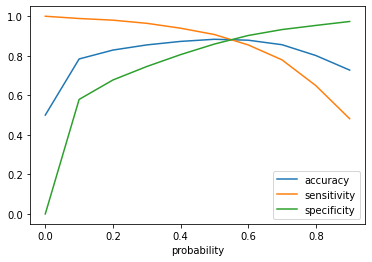

In [196]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#Analysis of the above curve


Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [197]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.004414,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000044,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000755,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000020,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.399317,4,1,1,1,1,0,0,0,0,0,0,0


## Confusion metrics

In [198]:
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[13341  2184]
 [ 1436 14089]]


In [199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.88341384863124
Sensitivity:- 0.9075040257648953
Specificity:- 0.8593236714975846


We have got good accuracy, sensitivity and specificity on the train set prediction.

##Plotting the ROC Curve (Trade off between sensitivity & specificity)


In [201]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

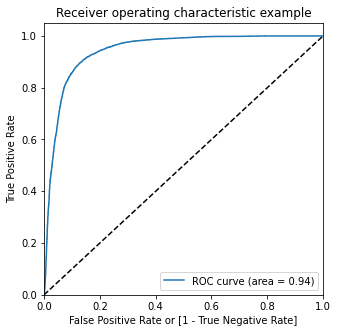

In [202]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

##Testing the model on the test set

In [203]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [204]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [205]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

Predictions on the test set with final model

In [207]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [212]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
58165,0
603,0
28696,0
34825,0
17757,0


In [213]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [214]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [215]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [216]:
y_test_pred_final.head()

,churn,CustID,0
0,0,58165,0
1,0,603,0
2,0,28696,0
3,0,34825,0
4,0,17757,0



Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

#Business recomendation

Top predictors

Below are few top variables selected in the logistic regression model.

Variables	Coefficients

loc_ic_mou_8	

og_others_7	

ic_others_8	

isd_og_mou_8	

decrease_vbc_action	

monthly_3g_8	

std_ic_t2f_mou_8	

monthly_2g_8

loc_ic_t2f_mou_8

roam_og_mou_8	0.7135

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

*Recomendations*

1) Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

2) Target the customers, whose outgoing others charge in July and incoming others on August are less.

3) Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

4) Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.

5) Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.

6) Cutomers decreasing monthly 2g usage for August are most probable to churn.

Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.

7)  variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

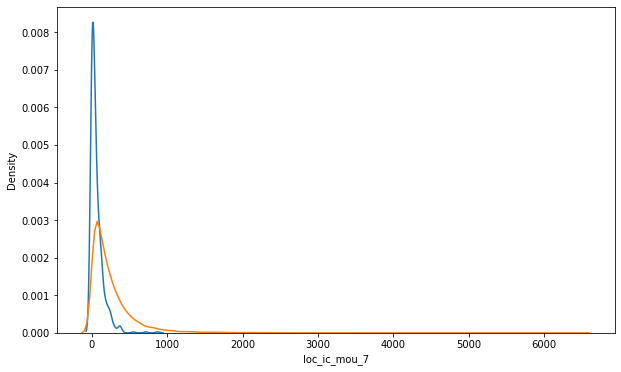

In [221]:
# Plotting loc_ic_mou_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_7'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_7'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of JULY is mostly populated on the lower side than the non churn customers.

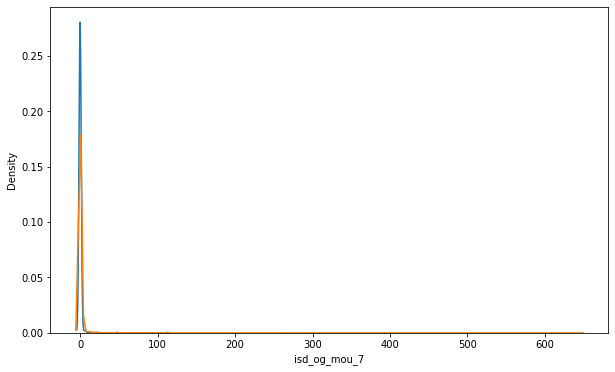

In [222]:
# Plotting isd_og_mou_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_7'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_7'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

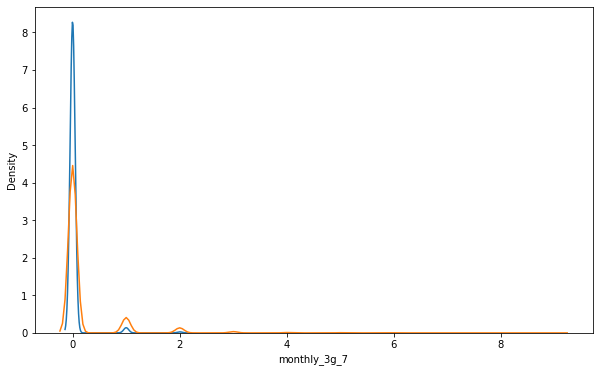

In [223]:
# Plotting monthly_3g_7 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_7'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_7'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.



Similarly we can plot each variables, which have higher coefficients, churn distribution.